In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Load the dataset

In [102]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")  # Make sure the path and file name are correct

In [103]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [104]:
X = train.drop('price_range', axis=1)
y = train['price_range']

In [105]:
y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [106]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

### One Hot Encoding

In [107]:
classification_cols = ["blue","dual_sim","four_g","three_g","touch_screen","wifi"]
X = pd.get_dummies(X,columns=classification_cols)

### Normalize the features

In [108]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [110]:
def build_model(input_shape):
    model = Sequential([
        Dense(256, input_dim=input_shape, activation='relu'),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dropout(0.2),
        Dense(4, activation='softmax')  # 4 output classes
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [111]:
model = build_model(X_train.shape[1])

In [112]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
40/40 [==============================] - 1s 5ms/step - loss: 1.3433 - accuracy: 0.3313 - val_loss: 1.1600 - val_accuracy: 0.4750
Epoch 2/25
40/40 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.5023 - val_loss: 0.6352 - val_accuracy: 0.7312
Epoch 3/25
40/40 [==============================] - 0s 2ms/step - loss: 0.7510 - accuracy: 0.6320 - val_loss: 0.4661 - val_accuracy: 0.8500
Epoch 4/25
40/40 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.6953 - val_loss: 0.4104 - val_accuracy: 0.8281
Epoch 5/25
40/40 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7461 - val_loss: 0.3249 - val_accuracy: 0.8781
Epoch 6/25
40/40 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7492 - val_loss: 0.3484 - val_accuracy: 0.8781
Epoch 7/25
40/40 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7586 - val_loss: 0.2814 - val_accuracy: 0.8938
Epoch 8/25
40/40 [==

In [113]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

13/13 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.9250
Test Accuracy: 92.50%


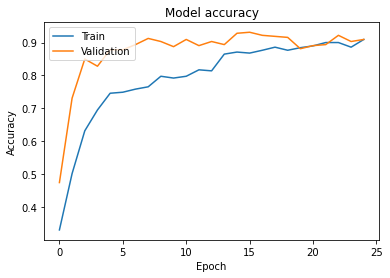

In [114]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

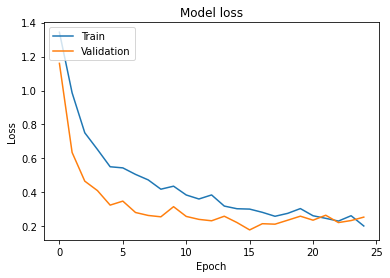

In [115]:
# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()